<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [34]:
file_name_df = "data\dst-3.0_16_1_hh_database.csv"
df_raw = pd.read_csv(file_name_df, sep=';')
df = df_raw.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [17]:
display(df.tail(3))

Пол, возраст           ЗП  \
44741  Женщина ,  48 лет , родилась 26 декабря 1970   40000 руб.   
44742   Мужчина ,  24 года , родился 6 октября 1994   20000 руб.   
44743    Мужчина ,  38 лет , родился 25 апреля 1980  120000 руб.   

        Ищет работу на должность:  \
44741  Аналитик данных, Математик   
44742            Контент-менеджер   
44743        Руководитель проекта   

                            Город, переезд, командировки  \
44741  Челябинск , готова к переезду , готова к редки...   
44742  Тамбов , не готов к переезду , не готов к кома...   
44743  Москва , не готов к переезду , не готов к кома...   

                                   Занятость                         График  \
44741                       полная занятость  полный день, удаленная работа   
44742  частичная занятость, полная занятость               удаленная работа   
44743                       полная занятость                    полный день   

                                             Опыт работы  \
44741  Опыт работы 21 год 5 месяцев  Январь 1998 — по...   
44742  Опыт работы 3 года 10 месяцев  Контент-менедже...   
44743  Опыт работы 15 лет 10 месяцев  Руководитель пр...   

                         Последнее/нынешнее место работы  \
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность  \
44741                 Начальник группы аналитики   
44742                          Менеджер проектов   
44743  Руководитель отдела технической поддержки   

                                       Образование и ВУЗ Обновление резюме  \
44741  Высшее образование 2000  Южно-Уральский госуда...  09.04.2019 05:07   
44742  Высшее образование 2015  Тамбовский государств...  26.04.2019 14:25   
44743  Высшее образование 1997  Южно-Российский госуд...  05.07.2018 20:15   

                                 Авто  
44741                      Не указано  
44742  Имеется собственный автомобиль  
44743                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [88]:
df.describe(include='all')

ЗП Ищет работу на должность:  \
count        44744                     44744   
unique         690                     14929   
top     50000 руб.   Системный администратор   
freq          4064                      3099   
mean           NaN                       NaN   
std            NaN                       NaN   
min            NaN                       NaN   
25%            NaN                       NaN   
50%            NaN                       NaN   
75%            NaN                       NaN   
max            NaN                       NaN   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   
mean                                                  NaN               NaN   
std                                                   NaN               NaN   
min                                                   NaN               NaN   
25%                                                   NaN               NaN   
50%                                                   NaN               NaN   
75%                                                   NaN               NaN   
max                                                   NaN               NaN   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   
mean            NaN                                                NaN   
std             NaN                                                NaN   
min             NaN                                                NaN   
25%             NaN                                                NaN   
50%             NaN                                                NaN   
75%             NaN                                                NaN   
max             NaN                                                NaN   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

       Последняя/нынешняя должность Обновление резюме        Авто Образование  \
count                         44742             44744       44744       44744   
unique                        16927             18838           2           4   
top         Системный администратор  07.05.2019 09:50  Не указано      высшее   
freq                           2062                25       32268       33863   
mean                            NaN               NaN         NaN         NaN   
std                             NaN               NaN         NaN         NaN   
min                             NaN               NaN         NaN         NaN   
25%                             NaN               NaN         NaN         NaN   
50%                             NaN               NaN         NaN         NaN   
75%                             NaN               NaN     

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [36]:
if "Образование и ВУЗ" in df.columns:
    df['Образование'] = df["Образование и ВУЗ"].apply(lambda arg: ' '.join(arg.split()[:2]).lower()) 
    df.pop("Образование и ВУЗ")
# df['Образование'].unique()
#  (['неоконченное высшее', 'высшее образование', 'среднее специальное', 'среднее образование']

# Перобразуем к целевым категориям
# -> "неоконченное высшее", "высшее",             "среднее специальное" и "среднее"
df.loc[df['Образование'] == 'высшее образование', 'Образование'] = 'высшее'
df.loc[df['Образование'] == 'среднее образование', 'Образование'] = 'среднее'
df['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [37]:
if "Пол, возраст" in df.columns:
    df['Пол'] = df["Пол, возраст"].apply(lambda arg: arg.split()[0][0]) 
    df['Возраст'] = df["Пол, возраст"].apply(lambda arg: int(arg.split()[2])) 
    df.pop("Пол, возраст")
print('Процентное соотношение мужчин и женщин:')
print(df['Пол'].value_counts(normalize=True))
print('Средний возраст соискателей:', df['Возраст'].mean())


Процентное соотношение мужчин и женщин:
М    0.809293
Ж    0.190707
Name: Пол, dtype: float64
Средний возраст соискателей: 32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [38]:
# Опыт работы 10 лет 8 месяцев
def extract_experience(arg):
    if not isinstance(arg, str):
        return np.nan
    elif arg == 'Не указано':
        return np.nan
    
    words = arg.split()
    # только месяцы
    if words[3][0:3] == 'мес':    
        return int(words[2])
    # годы и месяцы
    if words[5][0:3] == 'мес':    
        return 12*int(words[2]) + int(words[4])
    # только годы
    return 12*int(words[2])

col_name0 = 'Опыт работы'
col_name1 = 'Опыт работы (месяц)'
if col_name0 in df.columns:
    df[col_name1] = df[col_name0].apply(extract_experience)
    df.pop(col_name0)

print('Медианный опыт работы (в месяцах): ', df[col_name1].median())

Медианный опыт работы (в месяцах):  100.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [39]:

million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']

def extract_city(arg):
    if arg.find('Москва') >= 0:
        return 'Москва'
    if arg.find('Санкт-Петербург') >= 0:
        return 'Санкт-Петербург'
    words = arg.split(' ')
    city = words[0]
    if city == 'Нижний':
        city = city + ' ' + words[1]
    if city in million_cities:
        return "город-миллионник"
    return "другие"

def extract_ready_to_move(arg):
    flag1 = arg.find('готов к переезду') >= 0 or arg.find('готова к переезду') >= 0 or arg.find('хочу переехать') >= 0
    flag2 = arg.find('не готов к переезду') >= 0 or arg.find('не готова к переезду') >= 0 
    return flag1 and not flag2

def extract_ready_to_trips(arg):

    flag1 = arg.find('готов к командировкам') >= 0 \
        or arg.find('готова к командировкам') >= 0 \
        or arg.find('готов к редким') >= 0\
        or arg.find('готова к редким') >= 0
            
    flag2 = arg.find('не готов к командировкам') >= 0 \
        or arg.find('не готова к командировкам') >= 0 \
        or arg.find('не готов к редким') >= 0\
        or arg.find('не готова к редким') >= 0
    return flag1 and not flag2

col_name0 = 'Город, переезд, командировки'
if col_name0 in df.columns:
    col_name1 = 'Город'
    col_name2 = 'Готовность к переезду'
    col_name3 = 'Готовность к командировкам'
    df[col_name1] = df[col_name0].apply(extract_city)
    df[col_name2] = df[col_name0].apply(extract_ready_to_move)
    df[col_name3] = df[col_name0].apply(extract_ready_to_trips)
    df.pop(col_name0)

print("Количество процентов соискателей живут в Санкт-Петербурге: ", \
    100*df[col_name1].value_counts(normalize=True)['Санкт-Петербург'])
print("Количество процентов соискателей готовы одновременно и к переездам, и к командировкам: ", \
    100*(df[col_name2] * df[col_name3]).value_counts(normalize=True)[True])


Количество процентов соискателей живут в Санкт-Петербурге:  11.31771857679242
Количество процентов соискателей готовы одновременно и к переездам, и к командировкам:  31.86572501340962


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [40]:
col_name01 = 'Занятость' 
col_name02 = 'График' 

if (col_name01 in df.columns) and (col_name02 in df.columns):
    common_col = df['Занятость'] + df['График']
    df['полная занятость'] = common_col.apply(lambda x: 'полная занятость' in x)
    df['частичная занятость'] = common_col.apply(lambda x: 'частичная занятость' in x)
    df['проектная работа'] = common_col.apply(lambda x: 'проектная работа' in x)
    df['стажировка'] = common_col.apply(lambda x: 'стажировка' in x)
    df['волонтерство'] = common_col.apply(lambda x: 'волонтерство' in x)
    df['вахтовый метод'] = common_col.apply(lambda x: 'вахтовый метод' in x)
    df['гибкий график'] = common_col.apply(lambda x: 'гибкий график' in x)
    df['удаленная работа'] = common_col.apply(lambda x: 'удаленная работа' in x)
    df.pop(col_name01)
    df.pop(col_name02)

print('Количество людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True):', \
    (df['проектная работа'] * df['волонтерство']).value_counts()[True])

print('Количество людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True):', \
    (df['гибкий график'] * df['вахтовый метод']).value_counts()[True])
    

Количество людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True): 436
Количество людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True): 2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [41]:
# считать файл курса валют
file_name_exchange_rates = "data\ExchangeRates.csv"
df_exchange_rates = pd.read_csv(file_name_exchange_rates, sep=',')

# pd.options.mode.chained_assignment = None
if 'ЗП' in df.columns:
    # преобразовать дату 
    df_copy = df.copy()
    df_copy['date'] = pd.to_datetime(df_copy['Обновление резюме'].apply(lambda x: x[0:10]), format="%d.%m.%Y")
    df_exchange_rates['date'] = pd.to_datetime(df_exchange_rates['date'], format="%d/%m/%y")
    # получить сумму в фомате float
    df_copy['sum'] = df['ЗП'].apply(lambda x: float(x.split()[0]))
    # привести валюту в соответствие к iso
    move_currency = {
        'руб.':     'RUB',
        'бел.руб.': 'BYN',
        'грн.':     'UAH',
        'сум':      'UZS',
        'KZT':      'KZT',
        'USD':      'USD',
        'EUR':      'EUR',
        'KGS':      'KGS',
        'AZN':      'AZN',
        }
    df_copy['currency'] = df['ЗП'].apply(lambda x: move_currency[x.split()[1]])
    # объединить таблицы 
    df_common=df_copy.merge(df_exchange_rates[['currency','date','close','proportion']], how='left', on=['currency','date'])
    # заполнить пустые строки (рубли)
    mask_NaN = pd.isna(df_common['close'])
    df_common.loc[mask_NaN, 'close'] = 1
    df_common.loc[mask_NaN, 'proportion'] = 1
    # расчет зарплаты в рублях
    df['ЗП (руб)'] = df_common['sum'] * df_common['close'] / df_common['proportion']
    df.pop('ЗП')

print('Желаемая медианная заработная плата соискателей (в рублях):',\
    df['ЗП (руб)'].median())

Желаемая медианная заработная плата соискателей (в рублях): 59019.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [42]:
fig = px.histogram(df, x='Возраст', width=700, height=300)
fig.update_layout(    
    title='Гистограмма распределения признака "Возраст"',
    xaxis_title="Возраст",
    yaxis_title="Количество соискателей",
)
fig.show()

fig = px.box(df, x='Возраст', width=700, height=300)
fig.update_layout(
    title_x = 0.5,
    title='Коробчатая диаграмма признака "Возраст"',
    xaxis_title="Возраст",
)
fig.show()


# Описание распределения признака "Возраст"

Модальное значение возрастаа соисткателей 30 лет.
Половина соискателей в возрасте от 27 до 36 лет.
Данные содержат одно аномальное значение: 100 лет.
Без учета аномалий, диапазон возраста соискателей в данных изменяется от 14 до 76 лет. 


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [43]:
print(f'Наболее частое количество месяцев в опыте: { df["Опыт работы (месяц)"].mode()[0]}')
display(df["Опыт работы (месяц)"].describe())
fig = px.histogram(df, x='Опыт работы (месяц)', width=700, height=300)
fig.update_layout(    
    title='Гистограмма распределения признака "Опыт работы (месяц)"',
    xaxis_title="Опыт работы (месяцы)",
    yaxis_title="Количество соискателей",
)
fig.show()

fig = px.box(df, x='Опыт работы (месяц)', width=700, height=300)
fig.update_layout(
    title_x = 0.5,
    title='Коробчатая диаграмма признака "Опыт работы (месяц)"',
    xaxis_title="Опыт работы (месяц)",
)
fig.show()


Наболее частое количество месяцев в опыте: 81.0


count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

# Описание распределения признака "Опыт работы (месяц)"

Наибольшее количество соискателей с опытом работы 81 месяц (6 лет и 9 месяцев).
Половина соискателей в имеют опыт работы от 57 до 64 месяцев.
Данные содержат одно аномальное значение: 1188 месяцев (99 лет).
Без учета аномалий, диапазон изменения опыта работы от 1 до 663 месяцев (55 лет и 3 месяца, что вполное реалистично). 


3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [44]:
# https://plotly.com/python/histograms/#histograms-in-dash

salary = 'ЗП (руб)'
education='Образование'
city='Город'
age='Возраст'
experience='Опыт работы (месяц)'

print(f'Наболее часто запрашиваемую заработную плату: { df["ЗП (руб)"].mode()[0]}')
display(df["ЗП (руб)"].describe())

#  Исследование аномалий. Вычислить количество запросов с зарпалтой более 1М в месяц
flag = df[salary] >= 1000000
large_salary = df[flag][salary]
print(f'Количество запросов с зарпалтой 1 млн. руб. в месяц и более: {large_salary.count()}')
display (large_salary.value_counts().sort_index(ascending=True))

# #  Исследование аномалий. Вычислить количество запросов с зарпалтой менее 10 тыс в месяц
# salary = 'ЗП (руб)'
# flag = df[salary] < 1000
# large_salary = df[flag][salary]
# print(f'Количество запросов с зарпалтой менее 10 тыс. руб. в месяц: {large_salary.count()}')
# display (large_salary.value_counts().sort_index(ascending=True))

# Построим гистограммы и коробчатую диаграмму по признаку зарплаты (в рублях)
fig = px.histogram(df, x='ЗП (руб)', range_x=[0, 500000])
fig.update_layout(    
    title='Гистограмма распределения признака "ЗП (руб)" (ось Х ограничена диазоном [0, 500000] руб)',
    xaxis_title="ЗП (руб)",
    yaxis_title="Количество соискателей",
)
fig.show()

# fig = px.histogram(df, x='ЗП (руб)', width=700, height=300, range_x=[350000, 1500000], range_y=[0, 100], log_x=True)
fig = px.histogram(df, x='ЗП (руб)', height=300, log_y=True)
fig.update_layout(    
    title='Гистограмма распределения признака "ЗП (руб)" (по оси Y использована логарифмическая шкала)',
    xaxis_title="ЗП (руб)",
    yaxis_title="Количество соискателей",
)
fig.show()

fig = px.box(df, x='ЗП (руб)', height=300, log_x=True)
fig.update_layout(
    title_x = 1,
    title='Коробчатая диаграмма признака "ЗП (руб)" (по оси X использована логарифмическая шкала)',
    xaxis_title="ЗП (руб)",
)
fig.show()


Наболее часто запрашиваемую заработную плату: 50000.0


count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

Количество запросов с зарпалтой 1 млн. руб. в месяц и более: 6


1000000.0     1
1750000.0     1
2500000.0     1
3000000.0     1
7675224.0     1
24304876.0    1
Name: ЗП (руб), dtype: int64

Заработная плата, запрашиваемая соискателями наблюдается в диапазоне от 1,0 рубля до 24,3 млн. рублей в месяц. Большенство соискателез запрашивают зарплату от 37 до 35 тыс.руб./мес. Аномальными заработными платами можно (по правилу 3-х сигм) можно считать зарплату 1 руб. (слева) и зарплату более 180,9 тыс.руб./мес.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [45]:
flag = df[salary] < 1000000
df_sal = df[flag]
ds_sal = df[flag].groupby([education])[salary].median()
display(ds_sal)

fig = px.histogram(x=ds_sal.index, y=ds_sal.values, width=900, height=400)
fig.update_layout(    
    title='Диаграмма зависимости медианной желаемой заработной платы от уровня образования',
    xaxis_title="Образование",
    yaxis_title="Медианная заработная плата",)
fig.show()


fig = go.Figure()
# fig.add_trace(go.Box(y=df_sal[salary], x=df_sal[education], name='высшее'))
fig.add_trace(go.Box(y=df_sal[df_sal[education]=='высшее'][salary], name='высшее'))
fig.add_trace(go.Box(y=df_sal[df_sal[education]=='неоконченное высшее'][salary], name='неоконченное высшее'))
fig.add_trace(go.Box(y=df_sal[df_sal[education]=='среднее'][salary], name='среднее'))
fig.add_trace(go.Box(y=df_sal[df_sal[education]=='среднее специальное'][salary], name='среднее специальное'))
fig.update_yaxes(type="log")
fig.update_layout(title="Сравнение желаемой з/п в зависимости от уровня образования",
    xaxis_title="Образование",
    yaxis_title="Медианная заработная плата")
fig.show()

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64

**Выводы:**
Наибольшая желаемая заработная плата наблюдается у соискателей с высшим образованием, медианная з.п. равна 60 тыс. руб. У соискателей с неоконченным высшим образованием медианная з.п. меньше чем с высшим образованием, но больше чем со средним и средним специальным . Медианные з.п. у соискателей с средним и средним специальным образованием между собой не отличаются и равны 40 тыс.руб. 

Признак уровня образования для прогнозирования заработной платы: важен

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [46]:

flag = df[salary] < 1000000
ds=df_sal.groupby([city])[salary].median()
display(ds)

fig = px.histogram(x=ds.index, y=ds.values, width=900, height=400)
fig.update_layout(    
    title='Диаграмма зависимости медианной желаемой заработной платы от города',
    xaxis_title="Город",
    yaxis_title="Медианная заработная плата",
)
fig.show()

fig = go.Figure()
# fig.add_trace(go.Box(y=df_sal[salary], x=df_sal[city], name='высшее'))
fig.add_trace(go.Box(y=df_sal[df_sal[city]=='Москва'][salary], name='Москва'))
fig.add_trace(go.Box(y=df_sal[df_sal[city]=='Санкт-Петербург'][salary], name='Санкт-Петербург'))
fig.add_trace(go.Box(y=df_sal[df_sal[city]=='город-миллионник'][salary], name='город-миллионник'))
fig.add_trace(go.Box(y=df_sal[df_sal[city]=='другие'][salary], name='другие'))
# fig.update_yaxes(type="log")
fig.update_layout(title="Сравнение желаемой з/п в зависимости от города",
    # xaxis_title="Город",
    yaxis_title="Медианная заработная плата",
    )
fig.show()

Город
Москва              80000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: ЗП (руб), dtype: float64

**Выводы:**
Наибольшая желаемая заработная плата наблюдается у соискателей из г. Москва самая высокая, равна 80 тыс. руб; У соискателей из г. Санкт-Петербург  медианная з.п. на 20 тыс. руб. меньше в Москве, но больше в городах-миллионниках и других. Медианные з.п. у соискателей из городов-миллионников и других городов не отличаются и равны 40 тыс.руб. 

Признак "Город"  для прогнозирования заработной платы: важен

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [47]:
mobility='Мобильность'

df_sal = df_sal.copy()
df_sal.loc[(df_sal['Готовность к командировкам']==True) & (df_sal['Готовность к переезду']==True), mobility] = 'Готов к командировкам и переезду'
df_sal.loc[(df_sal['Готовность к командировкам']==True) & (df_sal['Готовность к переезду']==False), mobility] = 'Готов к командировкам, не готов к переезду'
df_sal.loc[(df_sal['Готовность к командировкам']==False) & (df_sal['Готовность к переезду']==True), mobility] = 'Не готов к командировкам, готов к переезду'
df_sal.loc[(df_sal['Готовность к командировкам']==False) & (df_sal['Готовность к переезду']==False), mobility] = 'Не готов к командировкам, не готов к командировкам'

ds = df_sal.groupby([mobility])[salary].median()
display(ds)

fig = px.histogram(x=ds.index, y=ds.values, height=400)
fig.update_layout(    
    title='Диаграмма зависимости медианной желаемой заработной платы от готовности к переезду и командировкам',
    xaxis_title="",
    yaxis_title="Медианная заработная плата",
)
fig.show()

Мобильность
Готов к командировкам и переезду                      65535.0
Готов к командировкам, не готов к переезду            60000.0
Не готов к командировкам, готов к переезду            50000.0
Не готов к командировкам, не готов к командировкам    40000.0
Name: ЗП (руб), dtype: float64

**Выводы**: 
- Соискатели, готовые к командировкам и перезду ожидают самую высокую зарплату. 
- Оба показателя готовности к переезду и командировкам влияют на уровнь ожидаемой заработной платы

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Образование     высшее  неоконченное высшее  среднее  среднее специальное
Возраст                                                                  
14            60000.00                  NaN      NaN                  NaN
15                 NaN                  NaN  10000.0               2000.0
16           122582.49                  NaN      NaN              30000.0
17            90075.50              80000.0  44000.0              25000.0
18            30000.00              25000.0  35000.0              25151.0
...                ...                  ...      ...                  ...
72            75000.00                  NaN      NaN                  NaN
73            62500.00                  NaN      NaN                  NaN
76            45000.00                  NaN      NaN                  NaN
77            90000.00                  NaN      NaN                  NaN
100                NaN                  NaN      NaN              60000.0

[63 rows x 4 columns]

<AxesSubplot:xlabel='Образование', ylabel='Возраст'>

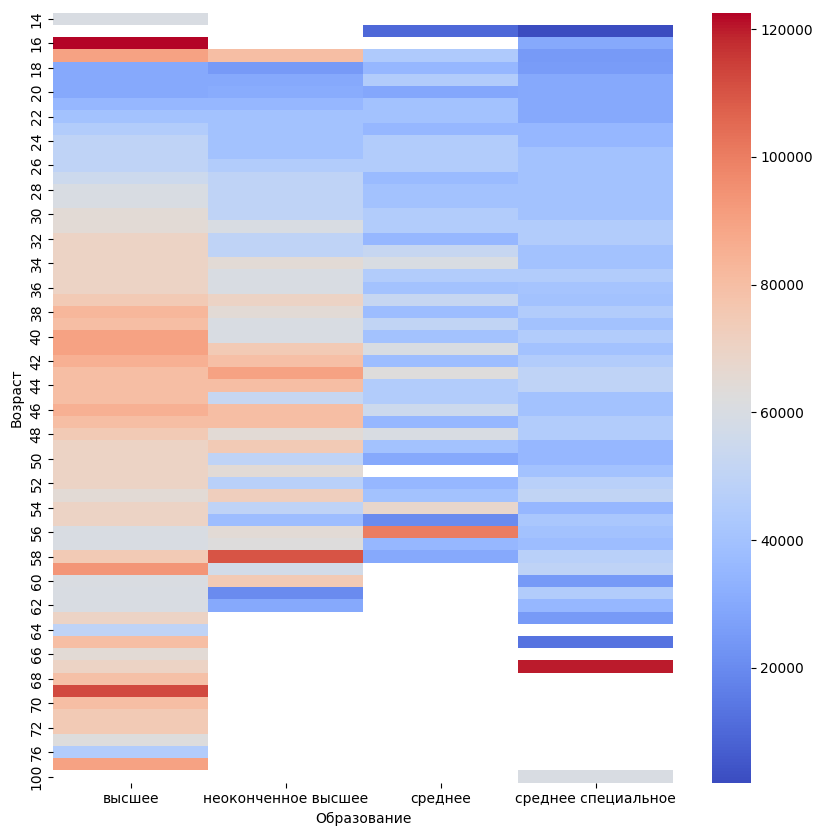

In [48]:
pt = df_sal.pivot_table(index=age, columns=education, values=salary, aggfunc='median')
display(pt)

plt.figure(figsize=(10, 10))
sns.heatmap(pt, cmap="coolwarm")   # Spectral, coolwarm

**Выводы**: 
- Соискатели с высшим образованием ожидают высокую заработную плату не смотря на свой возраст
- Соискатели с неоконченным высшим образованиеми ожидают зарплату выше, чем со средними образованями 
- Соискатели со средним специальным образованием в течение всей своей карьеры ожидаю одну и тужу зарплату

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

False    44737
True         7
dtype: int64

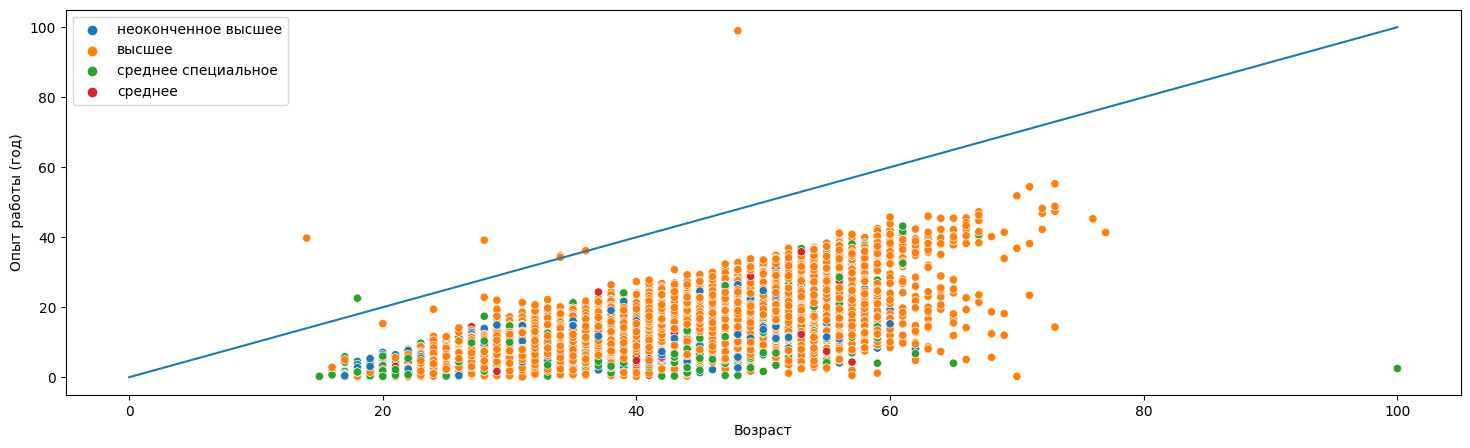

In [49]:
experience_year='Опыт работы (год)'
# ваш код здесь
df = df.copy()
df[experience_year]=df[experience]/12

# df.plot.scatter(x=age, y=experience_year, figsize=(15, 5))

plt.figure(figsize=(18, 5))
sns.scatterplot(x=df[age], y=df[experience_year], hue=df[education])
sns.lineplot(x=[0, 100], y=[0,100]) # style=7, hue=7

flag = df[experience_year] > df[age]
flag.value_counts()

**Вывод:** В 7 строках опыт выше чем возраст, чего не может быть. Эти строки должны быть исключены из анализа

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [50]:
# и так нормально

ваши выводы здесь

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [51]:
df_raw2 = df.copy() # Данные обработанные в предыдущих пунктах, но перед очисткой
print('Исходное количество строк и столбцов:', df.shape) #(44744, 18)
duplicates = df[df.duplicated(subset=df.columns)]
df = df.drop_duplicates() #158
print('Количество строк и столбцов после удаления:', df.shape) #(44586, 18)
print('Количество дубликатов:', duplicates.shape[0])

Исходное количество строк и столбцов: (44744, 22)
Количество строк и столбцов после удаления: (44586, 22)
Количество дубликатов: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [52]:
df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
стажировка                           0
волонтерство                         0
вахтовый метод                       0
гибкий график                        0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                  168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [53]:
# удалим строки, где есть пропуск в столбцах "Последнее/нынешнее место работы", "Последняя/нынешняя должность"
df_raw3 = df.copy() # Данные обработанные в предыдущих пунктах, но перед очисткой
df = df.dropna(subset=["Последнее/нынешнее место работы", "Последняя/нынешняя должность"])
# print(df.shape)  # (44584, 18)

# Пропуски в столбце с опытом работы заполним **медианным** значением.
df = df.fillna( {experience:df[experience].median()})
df[experience].mean()

114.35831239906693

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [54]:
flag = (df[salary]>1000000) + (df[salary]<1000)
flag.value_counts()
indexes_to_drop = df[flag].index
df = df.drop(labels=indexes_to_drop, axis=0) 
df.shape


(44495, 22)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [55]:
flag=(12*df[age]<df[experience])
outliers=df[flag].index
df=df.drop(outliers)
df.shape

(44488, 22)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Возраст соискателей, которые попадают под категорию выбросов: [15, 15, 100] лет


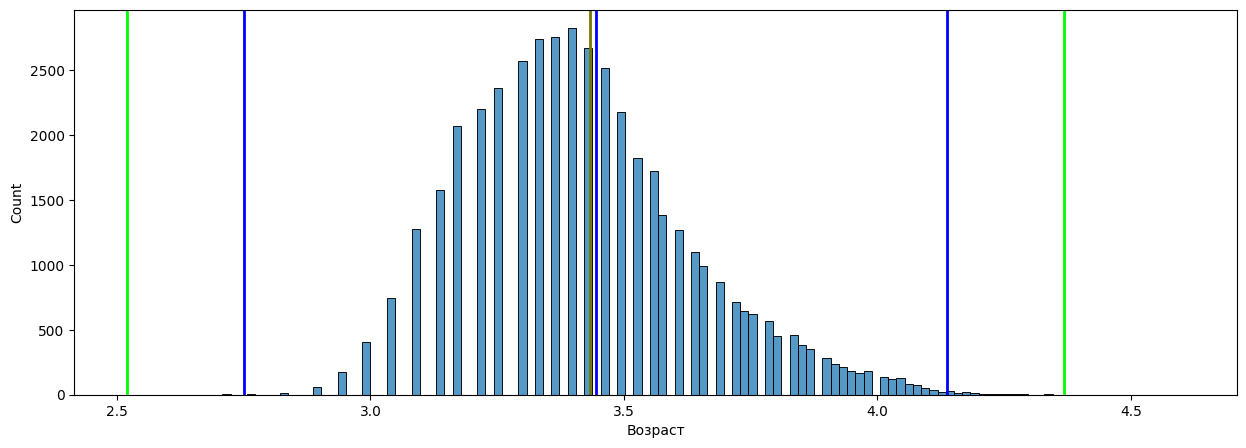

In [91]:
log_age=np.log(df[age])

mu = log_age.mean()
median = log_age.median()
sigma = log_age.std()
x_3s_min = mu - 3*sigma
x_3s_max = mu + 3*sigma
x_4s_min = mu - 4*sigma
x_4s_max = mu + 4*sigma

plt.figure(figsize=(15, 5))

sns.histplot(x=log_age) 
plt.axvline(x=mu, color='#0000ff', lw=2) 
plt.axvline(x=median, color='#777700', lw=2) 

plt.axvline(x=x_3s_min, color='#0000ff', lw=2) 
plt.axvline(x=x_3s_max, color='#0000ff', lw=2) 
plt.axvline(x=x_4s_min, color='#00ff00', lw=2) 
plt.axvline(x=x_4s_max, color='#00ff00', lw=2) 

# print((log_age < x_3s_min).value_counts())
# print((log_age > x_4s_max).value_counts())

flag = (log_age < x_3s_min) + (log_age > x_4s_max)

# print(flag.value_counts())
# print((~flag).value_counts())

print('Возраст соискателей, которые попадают под категорию выбросов:', list(df[flag][age]), 'лет')

Сторонность ассиметричных распределений можно посмотреть по [ссылке](https://www.codecamp.ru/blog/left-skewed-vs-right-skewed/). Так как на логарифмическом распределении среднее значение правее медианы («хвост» в правой части распределения).  :ваш коммментарий здесь

In [ ]:
22

In [ ]:
22

In [ ]:
2

In [ ]:
2

In [ ]:
111